## Multiple linear regresssion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
toyota=pd.read_csv('Toyota.csv')

In [3]:
toyota.columns


Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
toyota1=toyota.drop(labels=['Id', 'Model','Mfg_Month', 'Mfg_Year',
       'Fuel_Type', 'Met_Color', 'Color', 'Automatic','Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar','Cylinders'],axis=1)

In [5]:

toyota1.rename(columns={'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},inplace=True)

In [6]:
toyota1[toyota1.duplicated()]


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
toyota2=toyota1.drop_duplicates().reset_index(drop=True)

In [8]:
import seaborn as sns

In [9]:
toyota2.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [10]:
toyota2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


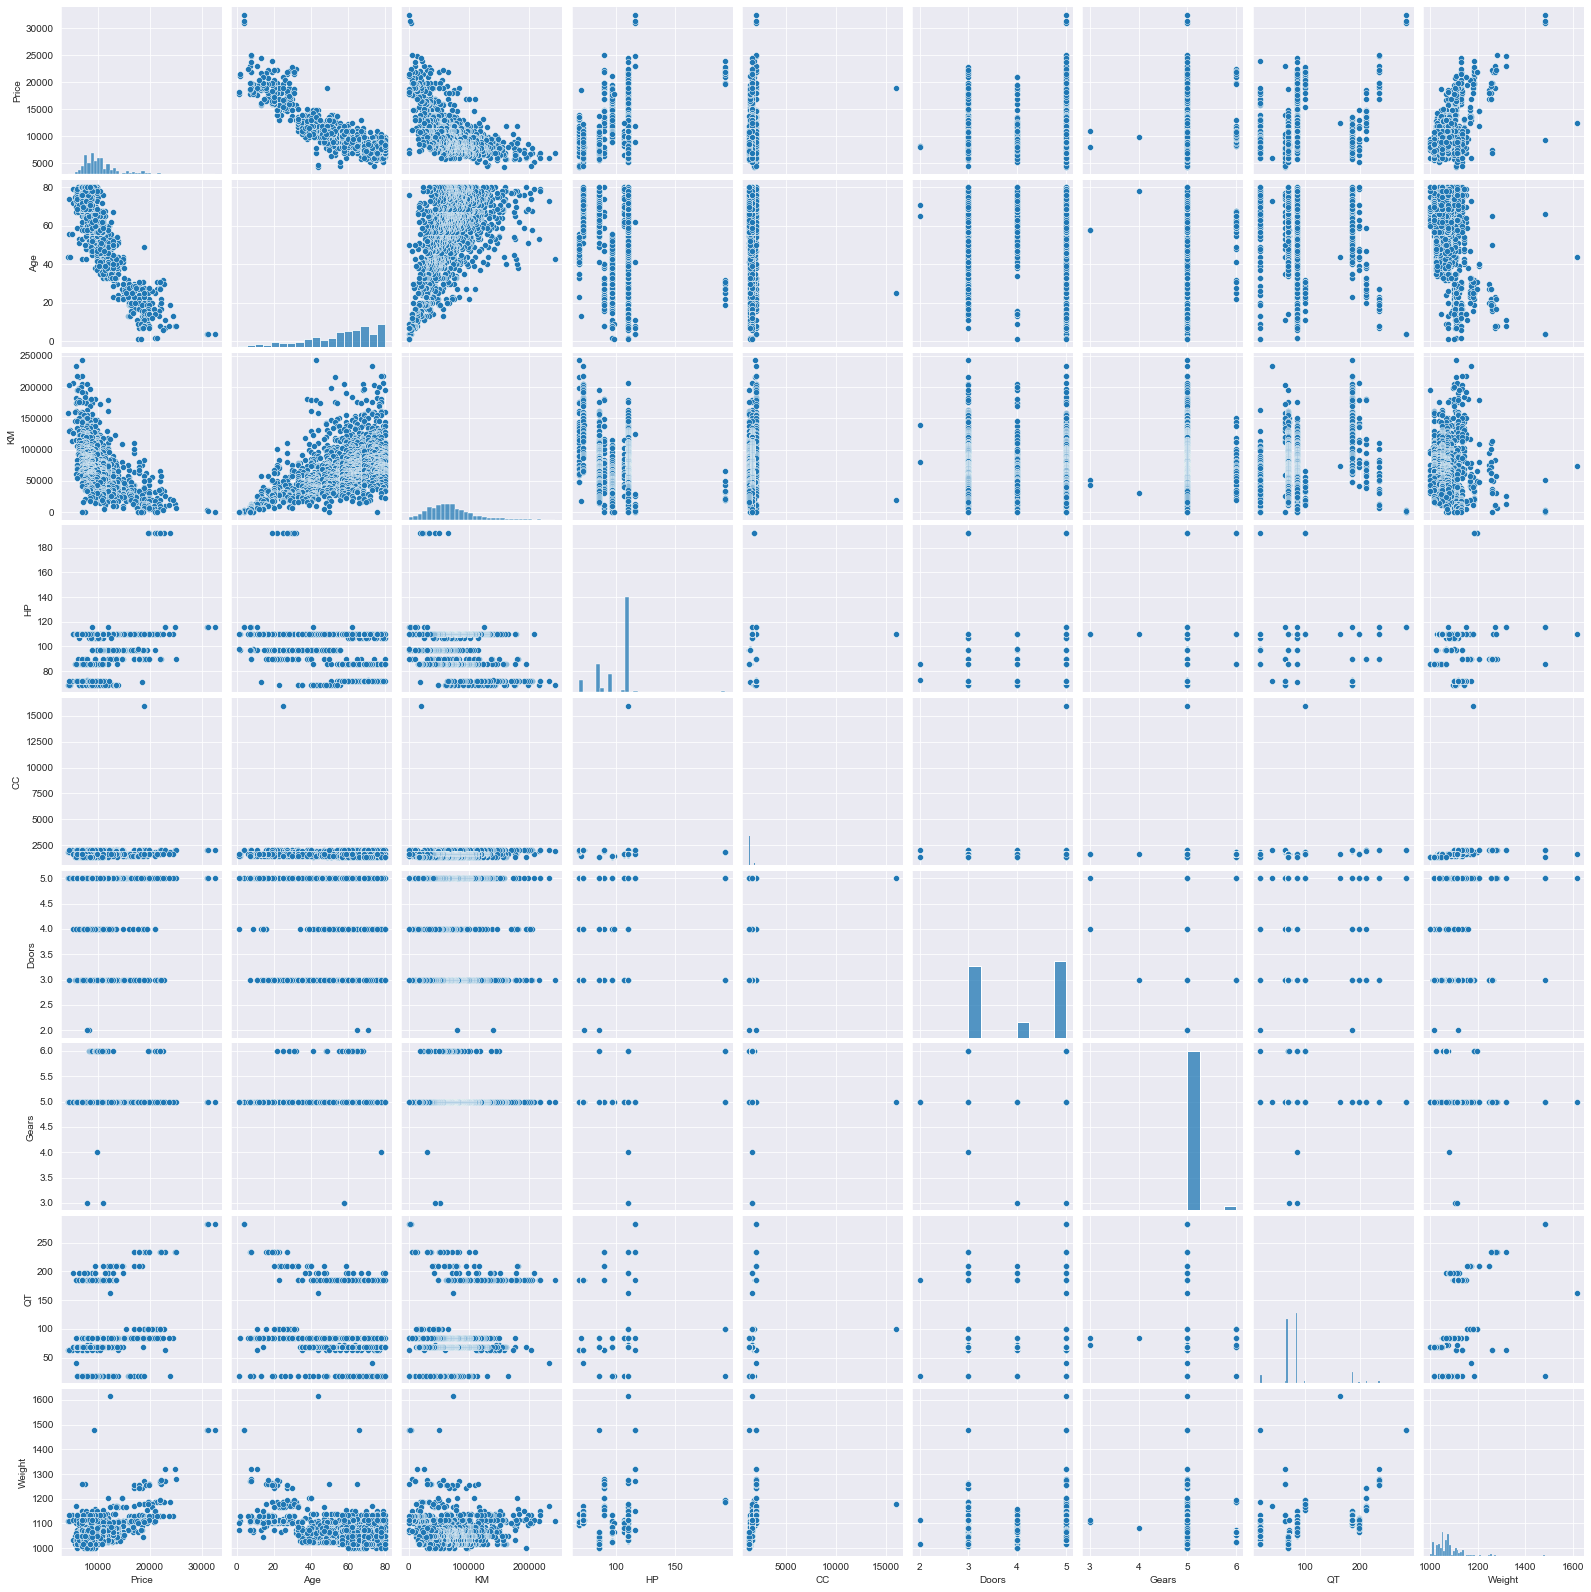

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota2)

# Preparing a Model

In [12]:
# Build model
import statsmodels.formula.api as smf

In [13]:
model=smf.ols('Price~KM+Age+HP+Weight+QT+CC+Doors+Gears',data=toyota2).fit()

# Model Testing

In [14]:
model.params

Intercept   -5472.540368
KM             -0.020737
Age          -121.713891
HP             31.584612
Weight         16.855470
QT              3.858805
CC             -0.118558
Doors          -0.920189
Gears         597.715894
dtype: float64

In [15]:
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 KM          -16.552424
 Age         -46.551876
 HP           11.209719
 Weight       15.760663
 QT            2.944198
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 dtype: float64,
 Intercept    0.00011
 KM           0.00000
 Age          0.00000
 HP           0.00000
 Weight       0.00000
 QT           0.00329
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 dtype: float64)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:50:13   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
HP            31.5846      2.818     11.210      0.000      26.058      37.112
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
QT             3.8588      1.311      2.944      0.003       1.288       6.430
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model.rsquared , model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [18]:
slr_CC=smf.ols('Price~CC',data=toyota2).fit()
slr_CC.tvalues,slr_CC.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [19]:
slr_door=smf.ols('Price~Doors',data=toyota2).fit()
slr_door.tvalues,slr_door.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [20]:
slr_door=smf.ols('Price~Doors+CC',data=toyota2).fit()
slr_door.tvalues,slr_door.pvalues

(Intercept    12.786341
 Doors         6.752236
 CC            4.268006
 dtype: float64,
 Intercept    1.580945e-35
 Doors        2.109558e-11
 CC           2.101878e-05
 dtype: float64)

# Model validation technique

# 1.Collinearty check and residual analysis

In [21]:
# 1) colllinearity problem check
#calculate VIF = 1/(1-Rsquare) for all independent varibles

In [22]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+QT+Weight+Gears',data=toyota2).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age+HP+CC+Doors+QT+Weight+Gears',data=toyota2).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~KM+Age+CC+Doors+QT+Weight+Gears',data=toyota2).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('CC~HP+KM+Age+Doors+QT+Weight+Gears',data=toyota2).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('Doors~CC+HP+KM+Age+HP+QT+Weight+Gears',data=toyota2).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_qt=smf.ols('QT~Doors+CC+HP+KM+Age+HP+CC+Weight+Gears',data=toyota2).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_gears=smf.ols('Gears~QT+Doors+CC+HP+KM+Age+HP+CC+Weight',data=toyota2).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_weight=smf.ols('Weight~Gears+QT+Doors+CC+HP+KM+Age+HP+CC',data=toyota2).fit().rsquared
vif_weight=1/(1-rsq_gears)


df={'Variables':['Age','KM','HP','CC','Doors','QT','Weight','Gears'],
   'Vif':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_qt,vif_weight,vif_gears]}

vif_df=pd.DataFrame(df)
vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,QT,2.295375
6,Weight,1.098843
7,Gears,1.098843


# Residual Analysis

## Test for Normality of Residuals(Q-Q Plot)

In [23]:
# none varible has VIF>20, no collinearity ,so consider all variables in regression equation

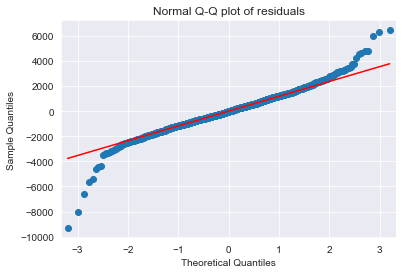

In [24]:
#2) Residual analysis
# Test for Normality od residuals(Q-Q plot) using residual model(model.resid)
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(model.resid>5000))

[array([109, 146, 522], dtype=int64)]

In [26]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

# Residual Plot for Homoscedasticity

In [27]:
# test for Homoscedasticity or heteroscedasticity(plotting model's standardized fitted values vs standardized residual values)


In [28]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

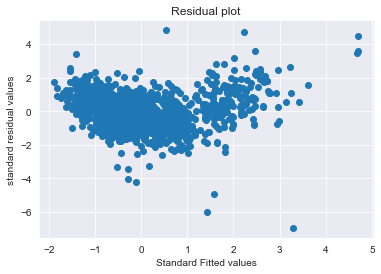

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standard Fitted values')
plt.ylabel('standard residual values')
plt.show()

In [30]:
# Test for errors or residual vs regressors or independent 'x' varies or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

# Residual Vs Regressors

eval_env: 1


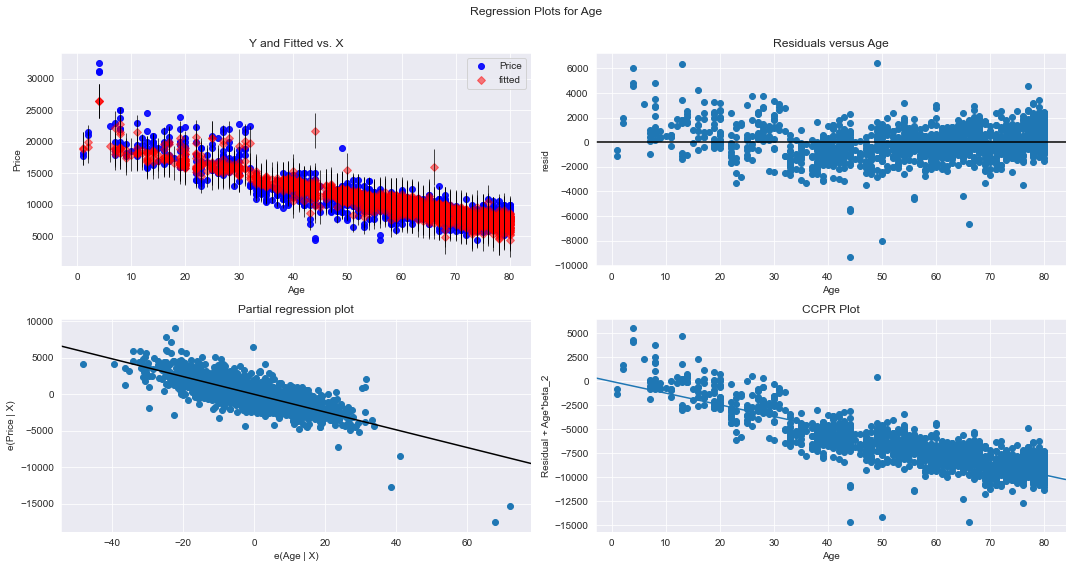

In [31]:
fig=plt.figure(figsize=(15,8))
firg=sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


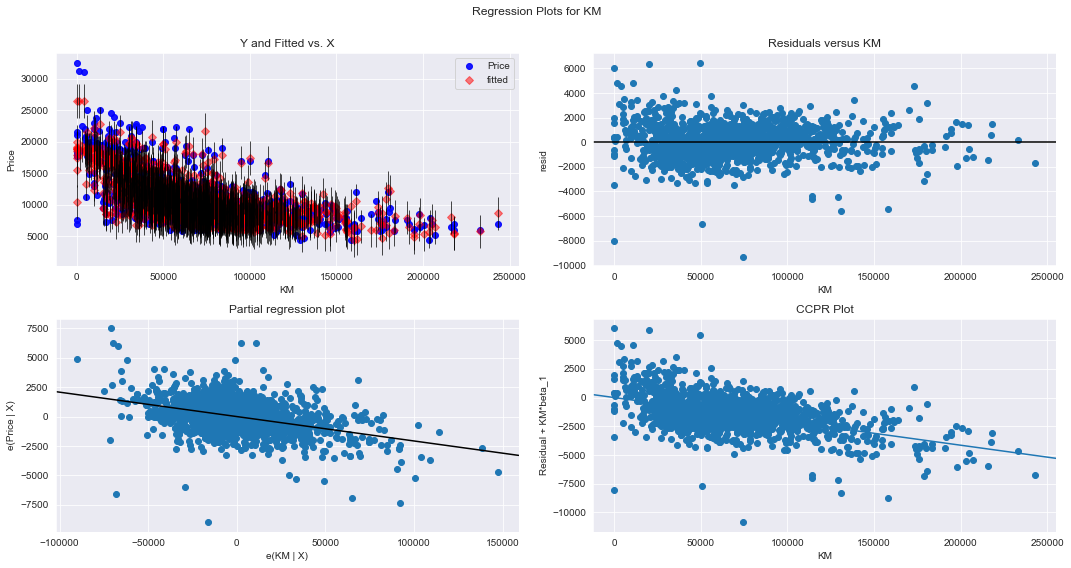

In [32]:
fig=plt.figure(figsize=(15,8))
firg=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


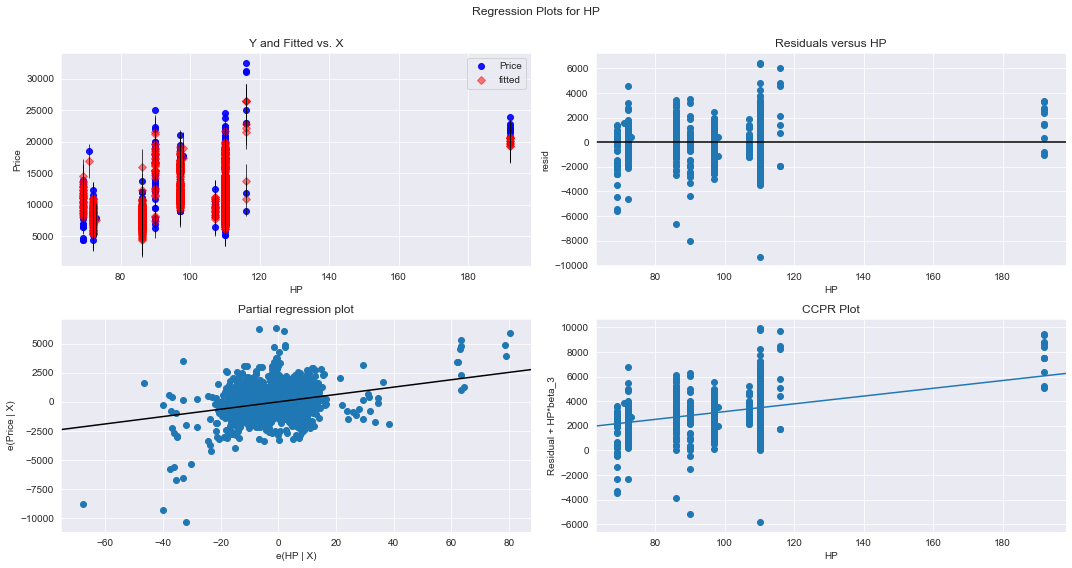

In [33]:
fig=plt.figure(figsize=(15,8))
firg=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


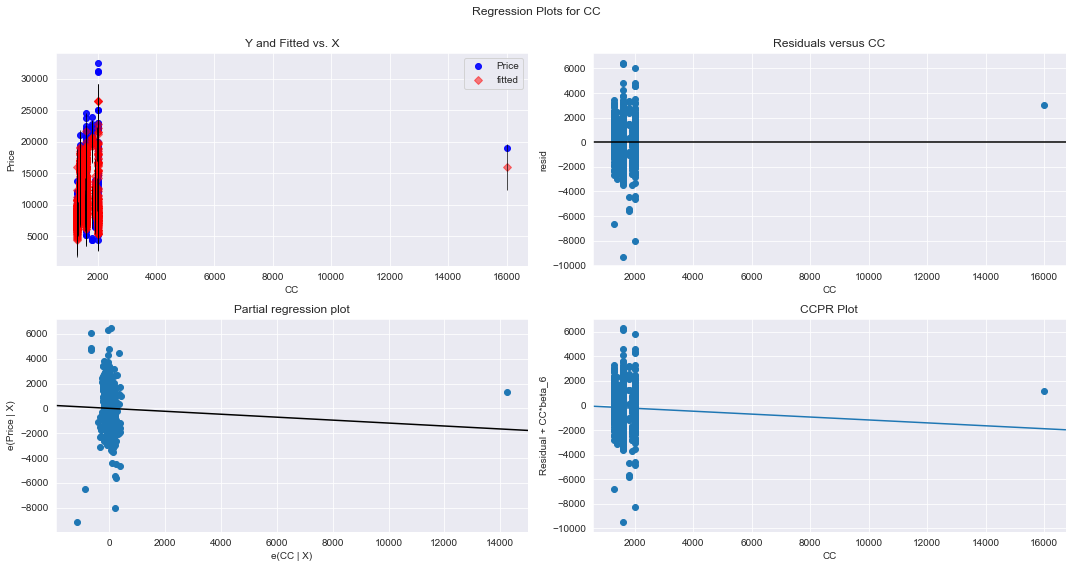

In [34]:
fig=plt.figure(figsize=(15,8))
firg=sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


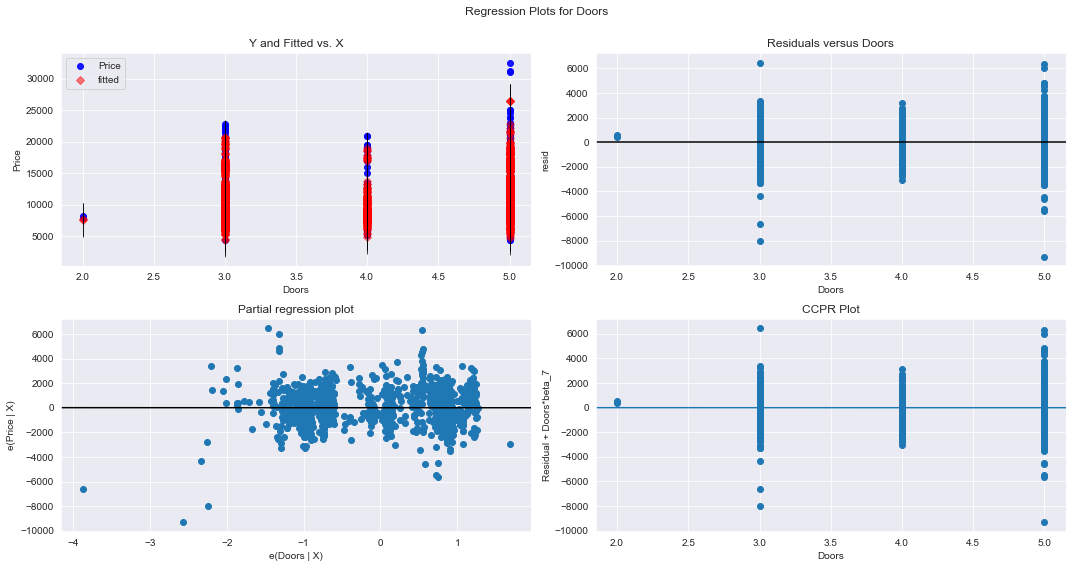

In [35]:
fig=plt.figure(figsize=(15,8))
firg=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


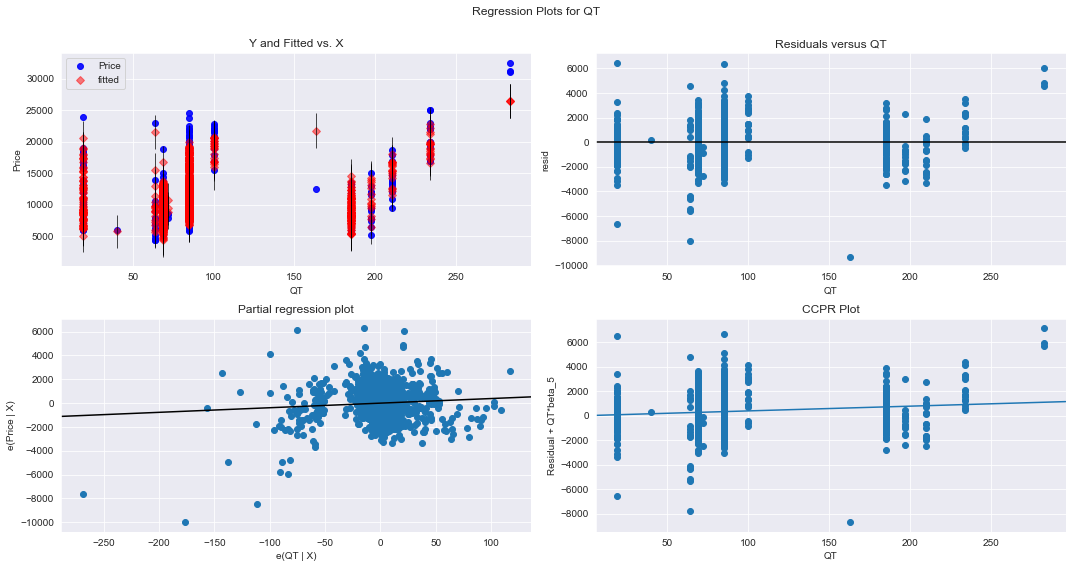

In [36]:
fig=plt.figure(figsize=(15,8))
firg=sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


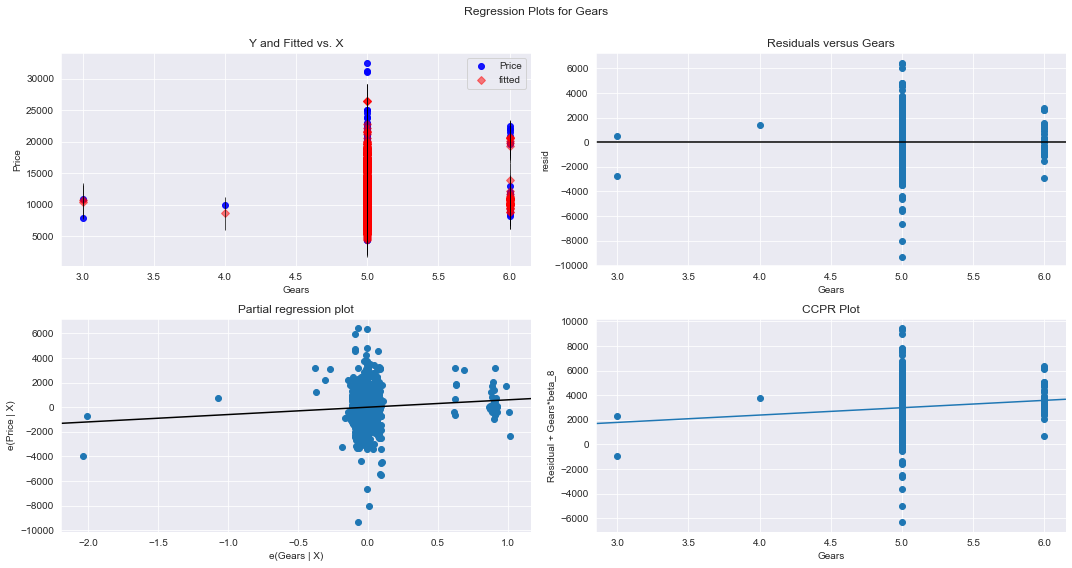

In [37]:
fig=plt.figure(figsize=(15,8))
firg=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


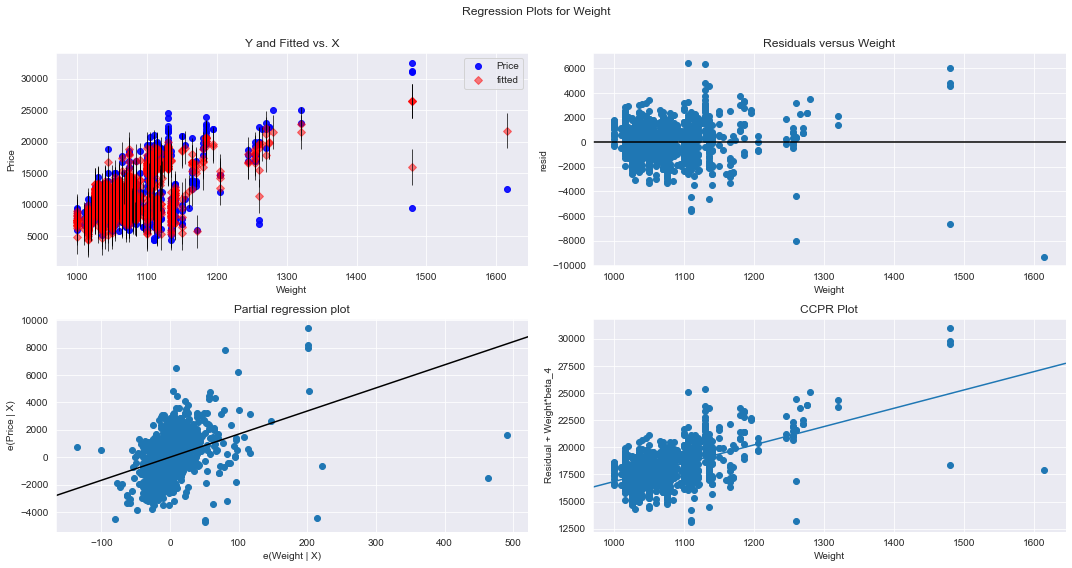

In [38]:
fig=plt.figure(figsize=(15,8))
firg=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook's Distance

In [39]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

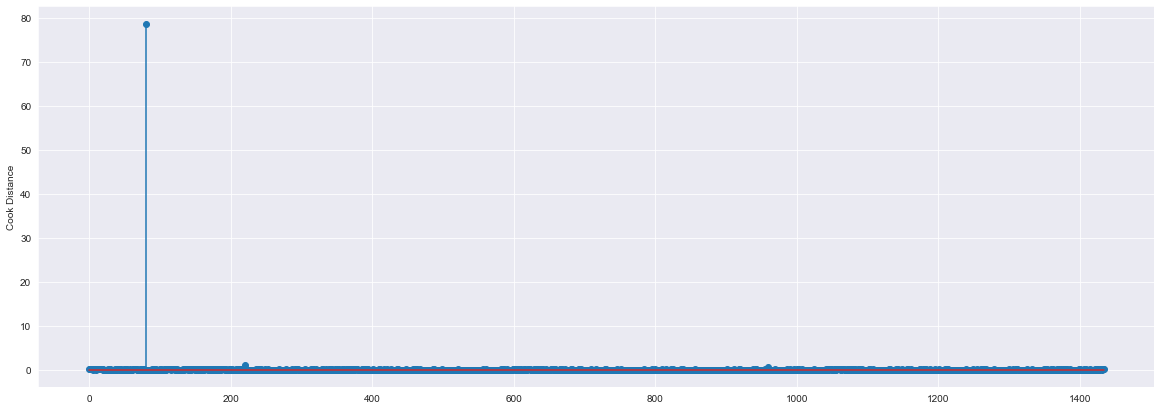

In [40]:
# plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota2)),np.round(c,3))
plt.xlabel;('Row index')
plt.ylabel('Cook Distance')
plt.show()

# High influence plot

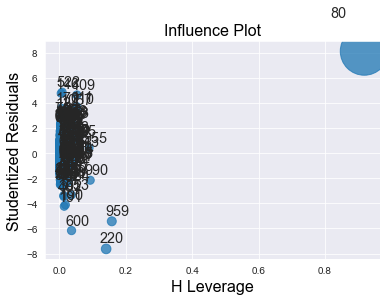

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()


In [42]:
k=toyota2.shape[1]
n=toyota2.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020905923344947737

In [43]:
toyota2[toyota2.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [44]:
toyota2.iloc[80]

Price     18950
Age          25
KM        20019
HP          110
CC        16000
Doors         5
Gears         5
QT          100
Weight     1180
Name: 80, dtype: int64

# Improving the model

In [45]:
# Creating a copy of data so that original dataset is not affected 
toyota_new=toyota2.copy()
toyota_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [46]:
# Discard the data points which are influensers and reassign the row number (reset_index(drop=True))

In [47]:
toyota3=toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index(drop=True)
toyota3


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## Model deletion Diagnostics and Final Model

In [48]:
while np.max(c)>0.5:
    model=smf.ols('Price~KM+Age+HP+Weight+QT+CC+Doors+Gears',data=toyota3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota3=toyota3.drop(toyota3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota3
else: 
    final_model=smf.ols('Price~KM+Age+HP+Weight+QT+CC+Doors+Gears',data=toyota3).fit()
    final_model.rsquared,final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [49]:
if np.max(c)>0.5:
    model=smf.ols('Price~KM+Age+HP+Weight+QT+CC+Doors+Gears',data=toyota3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota3=toyota3.drop(toyota3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota3
elif np.max(c)<0.5: 
    final_model=smf.ols('Price~KM+Age+HP+Weight+QT+CC+Doors+Gears',data=toyota3).fit()
    final_model.rsquared,final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [50]:
final_model.rsquared

0.8882395145171204

In [51]:
toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Model Predictions

In [52]:
# new data
new_data=pd.DataFrame({'Age':15,'KM':50000,'HP':60,'CC':1500,'Doors':4,'Gears':5,'QT':70,'Weight':1012},index=[0])

In [53]:
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,15,50000,60,1500,4,5,70,1012


In [54]:
# manual prediction of price
final_model.predict(new_data)

0    12416.278495
dtype: float64

In [55]:
#Automatic Prediction of price 
pred_y=final_model.predict(toyota3)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64